# 1. Télécharger le Projet Darknet de Yolo

In [1]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.16 MiB | 27.09 MiB/s, done.
Resolving deltas: 100% (3916/3916), done.


# 2. Pointer vers le bon dossier

In [2]:
cd darknet

/content/darknet


In [3]:
ls

cfg/       include/      LICENSE.gen   LICENSE.mit  python/    src/
data/      LICENSE       LICENSE.gpl   LICENSE.v1   README.md
examples/  LICENSE.fuck  LICENSE.meta  Makefile     scripts/


# 3. Compiler le projet Yolo

In [4]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

# 4. Récupérer les poids de yolo v3 (modèle pré-entrainé)

In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-10-22 21:06:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  37.9MB/s    in 6.6s    

2019-10-22 21:06:57 (35.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



# 5. Tester le modèle YoloV3 sur une image d'entrée (a importer)

In [9]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights ../dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [12]:
ls

backup/    include/        LICENSE.gen   Makefile         results/
cfg/       libdarknet.a    LICENSE.gpl   obj/             scripts/
darknet*   libdarknet.so*  LICENSE.meta  predictions.jpg  src/
data/      LICENSE         LICENSE.mit   python/          yolov3.weights
examples/  LICENSE.fuck    LICENSE.v1    README.md


# 6. Visualiser le résultat "predictions.jpg"

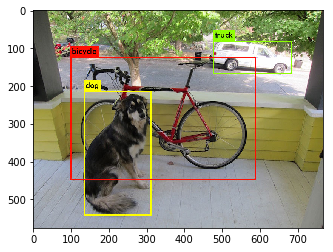

In [13]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
test_image = mpimg.imread(os.path.join("predictions.jpg"))
plt.imshow(test_image)
plt.axis("on")
plt.show()